# CME + Flare Locations

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sunpy.map
import astropy.units as u
import sunpy.coordinates
from sunpy.coordinates import frames
from astropy.io import fits
import datetime as dt

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

In [3]:
# AIA sample map
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 
smap = sunpy.map.Map(sample_map)

In [4]:
# SMART props
smt = df[['smart_observation_time', 
          'smart_string_latlon',
          'smart_hg_latitude',
          'smart_hg_longitude',
          'smart_hcx_position',
          'smart_hcy_position',
          'smart_total_area']]
smt = smt.dropna(how='any')
smt = smt.reset_index(drop=True)

# Flare props
fls = df[['flare_peak_time',
          'flare_hcx_position',
          'flare_hcy_position',
          'goes_flux']]
fls = fls.dropna(how='any')
fls = fls.reset_index(drop=True)

In [5]:
# Converting coords: Flare props
lons_f = (fls['flare_hcx_position'].values*u.arcsec).to(u.deg)
lats_f = (fls['flare_hcy_position'].values*u.arcsec).to(u.deg)
size_f = 30*fls.goes_flux/fls.goes_flux.mean()

# Converting coords: SMART props
lons_s = (smt['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_s = (smt['smart_hcy_position'].values*u.arcsec).to(u.deg)
size_s = 30*smt.smart_total_area/smt.smart_total_area.mean()

In [6]:
# Changing the dates for colorbar 
flare_dates = fls['flare_peak_time'].values.astype(float)
smt_dates = smt['smart_observation_time'].values.astype(float)

[Text(1, 1.014741474e+18, '2002-02-26'),
 Text(1, 1.25700213e+18, '2009-10-31'),
 Text(1, 1.507335646e+18, '2017-10-07')]

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


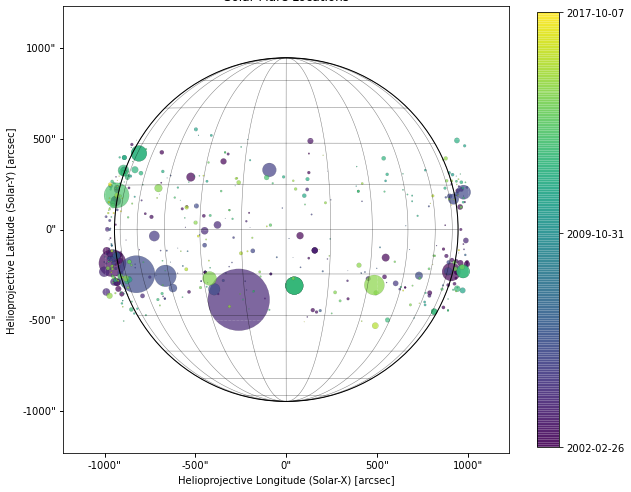

In [10]:
# Plotting flare locations
fig = plt.figure(figsize=[10,10], facecolor='white')
ax1 = fig.add_subplot(projection=smap)

smap.plot(cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax1.set_autoscale_on(False)
ax1.set_title('Solar Flare Locations')

# Scatter plot
sct1 = ax1.scatter(lons_f, lats_f, s=size_f, edgecolor='k', lw=0.1,
                   c=flare_dates, alpha=0.7, transform=ax1.get_transform('world'))

# Colourbar ---> manually setting three dates 
cbar1 = fig.colorbar(sct1, orientation='vertical', shrink=0.8,
                     ticks=[min(flare_dates), flare_dates[247], max(flare_dates)])
cbar1.ax.set_yticklabels(['2002-02-26', '2009-10-31', '2017-10-07'])

#plt.savefig('flare_locations.png', dpi=300, bbox_inches="tight", pad_inches=1)

[Text(1, 8.4938688e+17, '1996-11-30'),
 Text(1, 1.20171474e+18, '2008-01-30'),
 Text(1, 1.55798268e+18, '2019-05-16')]

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


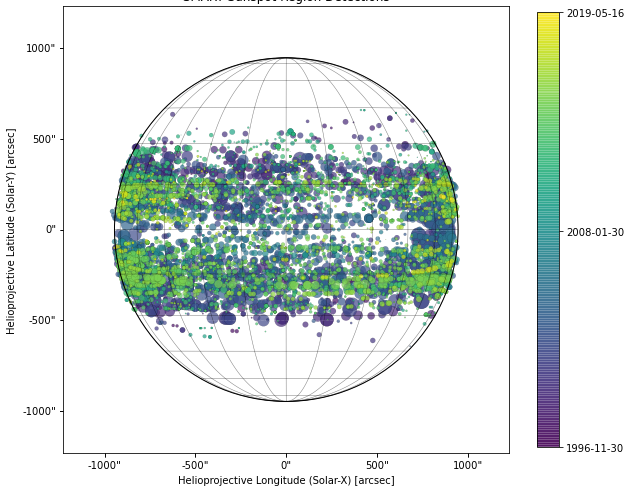

In [14]:
# Plotting SMART sunspot locations
fig = plt.figure(figsize=[10,10], facecolor='white')
ax2 = fig.add_subplot(projection=smap)

smap.plot(cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax2.set_autoscale_on(False)
ax2.set_title('SMART Sunspot Region Detections')

# Scatter plot
sct2 = ax2.scatter(lons_s, lats_s, s=size_s, edgecolor='k', lw=0.1,
                   c=smt_dates, alpha=0.7, transform=ax2.get_transform('world'))

# Colourbar ---> manually setting three dates 
cbar2 = fig.colorbar(sct2, orientation='vertical', shrink=0.8, ticks=[min(spt_dates), spt_dates[2731], max(spt_dates)])
cbar2.ax.set_yticklabels(['1996-11-30', '2008-01-30', '2019-05-16'])

#plt.savefig('smart_locations.png', dpi=300, bbox_inches="tight", pad_inches=1)

In [16]:
# Very few flare events being plotted...a lot more if I use the hg positions
fls2 = df[['flare_peak_time', 
           'flare_hg_latitude',
           'flare_hg_longitude',
           'goes_flux']]
fls2 = fls2.dropna(how='any')
fls2 = fls2.reset_index(drop=True)

In [53]:
# Converting coords: Flare props
lons_f2 = (fls2['flare_hg_longitude'].values*u.deg).to(u.deg)
lats_f2 = (fls2['flare_hg_latitude'].values*u.deg).to(u.deg)
size_f2 = 30*fls2.goes_flux/fls2.goes_flux.mean()

In [58]:
min(lons_f2) # Way too big!

<Quantity -92. deg>

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


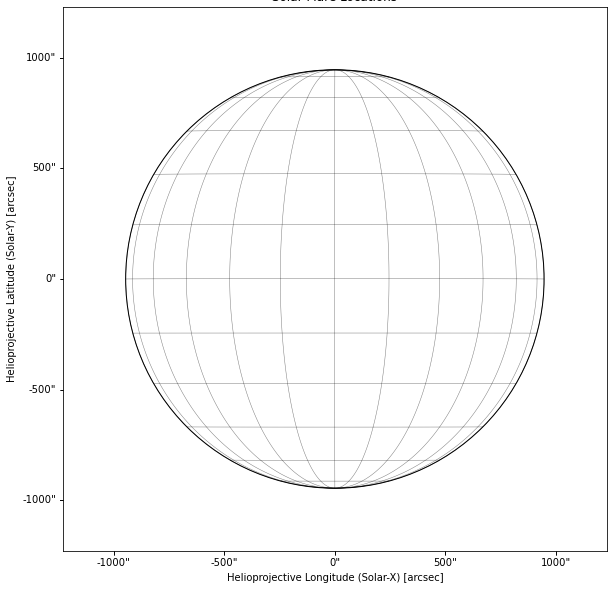

In [57]:
# Plotting flare locations
fig = plt.figure(figsize=[10,10], facecolor='white')
ax3 = fig.add_subplot(projection=smap)

smap.plot(cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax3.set_autoscale_on(False)
ax3.set_title('Solar Flare Locations')

# Scatter plot
sct3 = ax3.scatter(lons_f2, lats_f2, edgecolor='k', lw=0.1,
                   c=fls2['flare_peak_time'], alpha=0.7, transform=ax3.get_transform('world'))

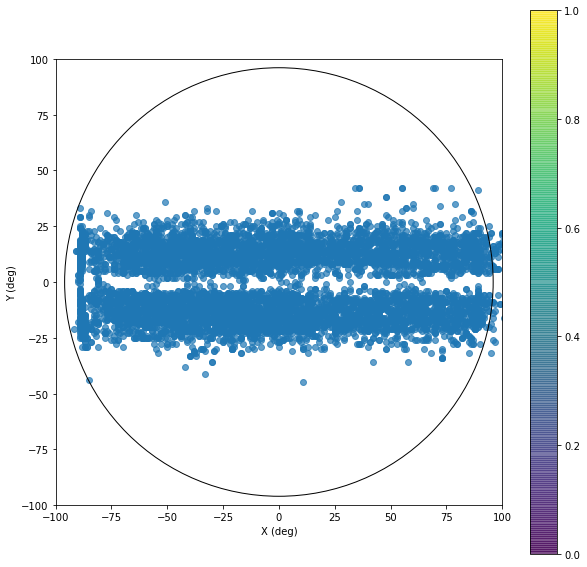

In [65]:
fig = plt.figure(figsize=[10,10])
circ = plt.Circle((0, 0), 96, color='k', fill=False)
plt.scatter(lons_f2, lats_f2, alpha=0.7)

plt.xlim(-100, 100)
plt.ylim(-100, 100)

ax = plt.gca()
ax.add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (deg)')
plt.ylabel('Y (deg)')
plt.colorbar()

In [73]:
# CME and flares
cme = df[['cme_time',
          'cme_angle',
          'cme_speed',
          'cme_halo',
          'flare_peak_time',
          'flare_hcx_position',
          'flare_hcy_position',
          'goes_flux']]
cme = cme.dropna(how='any')
cme = cme.reset_index(drop=True)

In [78]:
size_f3 = 30*cme.goes_flux/cme.goes_flux.mean()

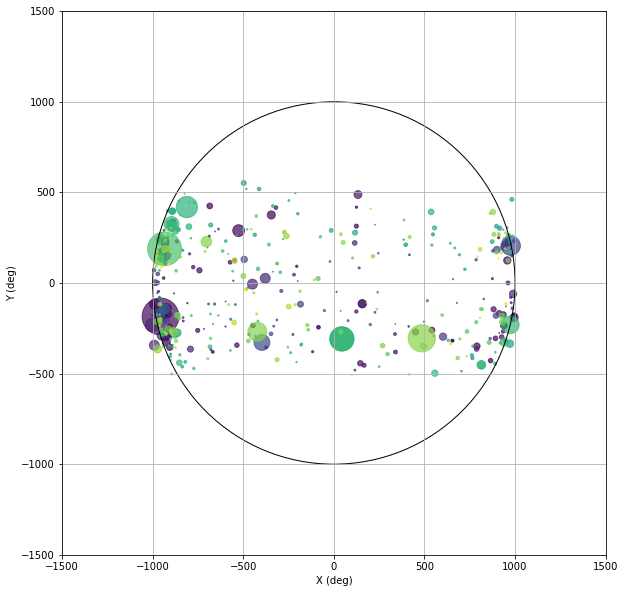

In [103]:
fig = plt.figure(figsize=[10,10])
circ = plt.Circle((0, 0), 1000, color='k', fill=False)
plt.scatter(cme.flare_hcx_position, cme.flare_hcy_position, c=cme.flare_peak_time, s=size_f3, alpha=0.7)

plt.xlim(-1500, 1500)
plt.ylim(-1500, 1500)

ax = plt.gca()
ax.add_artist(circ)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (deg)')
plt.ylabel('Y (deg)')
plt.grid()

#fig.add_artist(lines.Line2D([0.6, 0.5], [0.7, 0.5]))

In [83]:
cme.cme_angle

0      202.0
1      246.0
2       98.0
3       81.0
4      142.0
       ...  
479     87.0
480     82.0
481    307.0
482     96.0
483    290.0
Name: cme_angle, Length: 484, dtype: float64

In [84]:
import matplotlib.lines as lines